# Stroke Prediction using Classification

###### Here we use people's basic and health data to predict  whether the one will get affected by stroke or not

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
#importing data
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
#viewing data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


BMI - Body Mass Index

In [4]:
#viewing shape of data
data.shape

(5110, 12)

In [5]:
#data description
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#viewing data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Preprocessing

#### Spotting and filling missing values

In [7]:
#viewing missing values
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

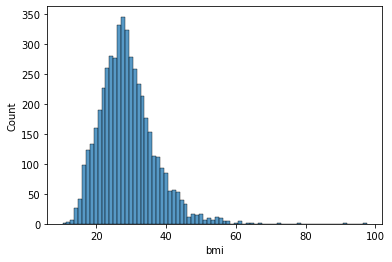

In [8]:
bmi=data["bmi"]
sns.histplot(bmi)

In [9]:
#filling missing values with mean
data["bmi"]=data["bmi"].fillna(data["bmi"].mean())

In [10]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

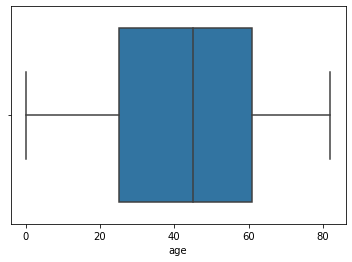

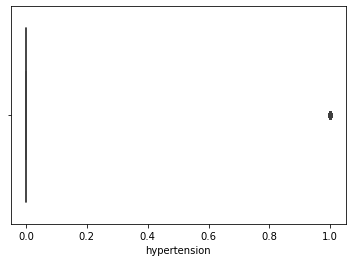

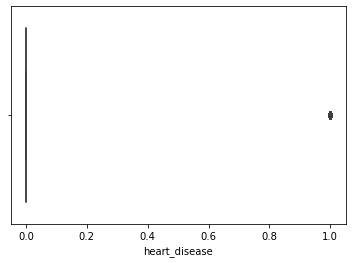

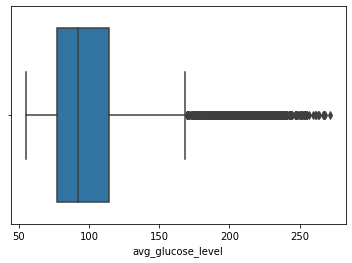

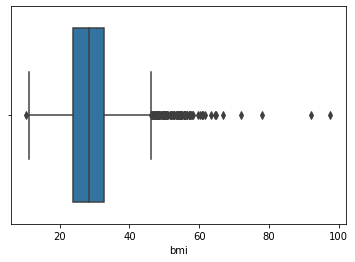

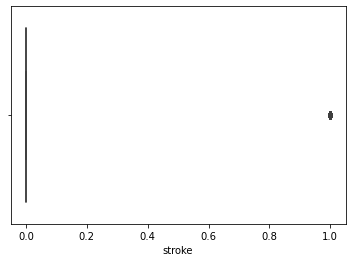

In [11]:
#plotting to find outliers
for i in data[["age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"]]:
    sns.boxplot(x=data[i])
    plt.show()

#### Featue Reduction

In [12]:
#dropping irrelevant column
data=data.drop("id",axis=1)

In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
#viewing unique values in column gender
data["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [15]:
#viewing unique values in column ever married
data["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
#viewing unique values in column work type
data["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
#viewing unique values in column residence type
data["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [18]:
#viewing unique values in column smoking status
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

#### Encoding

In [14]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data["gender"]=label_en.fit_transform(data["gender"])

In [15]:
data["ever_married"]=label_en.fit_transform(data["ever_married"])
data["Residence_type"]=label_en.fit_transform(data["Residence_type"])

In [16]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [17]:
#One hot encoding
data=pd.get_dummies(data)

In [23]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


#### Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
data=min_max.fit_transform(data)

## Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

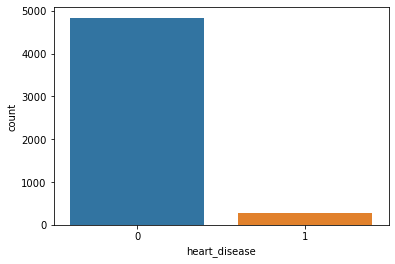

In [24]:
sns.countplot(x="heart_disease",data=data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

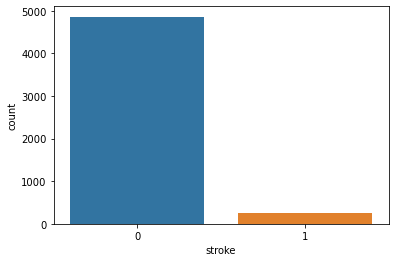

In [25]:
sns.countplot(x="stroke",data=data)

### Bivariate Analysis 

<AxesSubplot:xlabel='stroke', ylabel='count'>

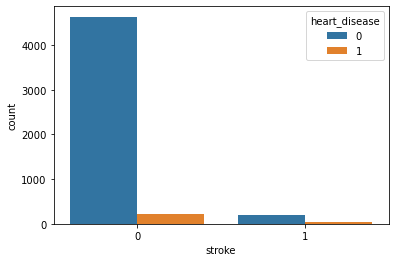

In [17]:
sns.countplot(x="stroke",hue="heart_disease",data=data)

Text(0.5, 1.0, 'Hypertension vs Age')

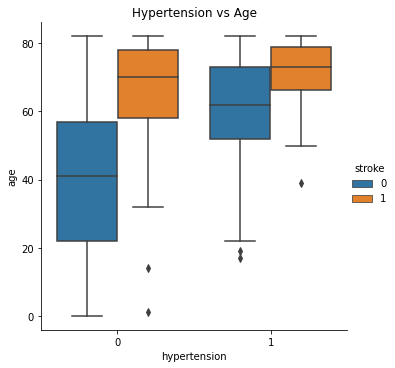

In [15]:
sns.catplot(x="hypertension",y="age",hue="stroke",kind="box",data=data)
plt.title("Hypertension vs Age")

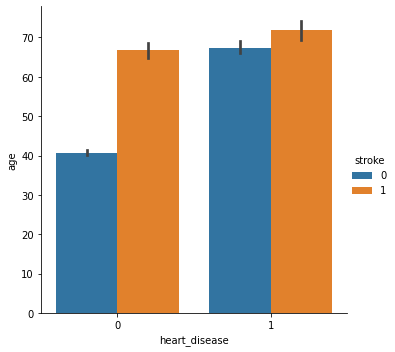

In [8]:
sns.catplot(x="heart_disease",y="age",hue="stroke",kind="bar",data=data)

<AxesSubplot:>

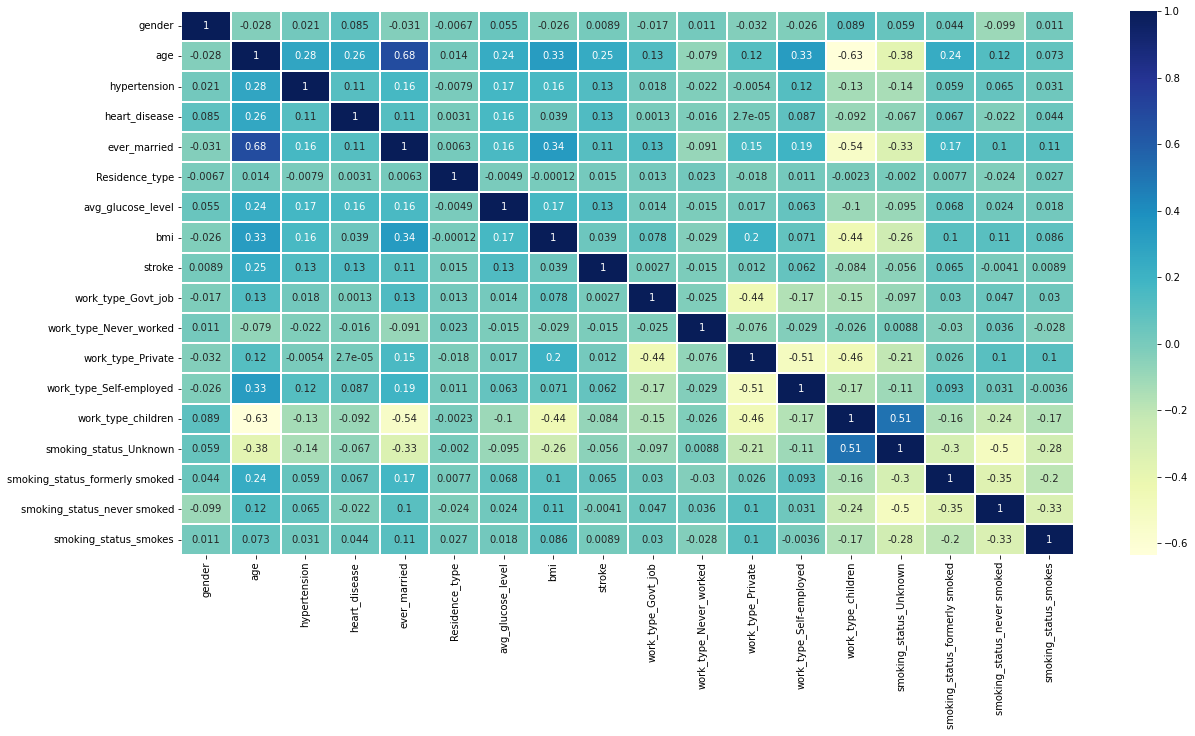

In [27]:
corr=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr,linewidths=0.2,cmap="YlGnBu",annot=True)

## Modeling

In [19]:
#splitting data
x=data.drop(["stroke"],axis=1)
y=data["stroke"]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

In [51]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))

Accuracy score is  0.9549902152641878


In [34]:
confusion_matrix(y_pred,y_test)

array([[976,  46],
       [  0,   0]], dtype=int64)

### SVM

Linear SVM

In [41]:
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [42]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))

Accuracy score is  0.9549902152641878


Polynomial SVM

In [80]:
svm_poly=SVC(kernel="poly",degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [81]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))

Accuracy score is  0.9549902152641878


Radial SVM

In [82]:
svm_radial=SVC(kernel="rbf")
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [83]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))

Accuracy score is  0.9549902152641878


### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [44]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))

Accuracy score is  0.9148727984344422


### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [55]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))

Accuracy score is  0.9569471624266145
precision_score is  0.9784313725490197


### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(5,20)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [63]:
acc

0.9549902152641878

#### Insight

Here we got most accuracy on Random Forest Classifier

## Hyper Parameter Tuning

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=20, n_estimators=1000)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [44]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))

Accuracy score is  0.9422700587084148


In [85]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators= 400,bootstrap=True,max_depth=5,max_features="auto",min_samples_leaf=100,min_samples_split=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy score is ",accuracy_score(y_test,y_pred))

Accuracy score is  0.9461839530332681


###### Hyper Parameter tuning increased the Accuracy score